## Import Libraries

In [1]:
# Library to support working with data
import numpy as np
import pandas as pd

# Graphing support library
import matplotlib.pyplot as plt

# Data Normalization Support Library
from sklearn.preprocessing import MinMaxScaler

# Library to support building Linear Regression models
from sklearn.linear_model import LinearRegression

# Performance metrics calculation support library
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_squared_log_error

## Data preprocessing

### Read data

In [2]:
df = pd.read_csv('ABBV-AbbVie.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-03-01,79.769997,80.849998,79.279999,80.099998,62.999916,8567900
1,2019-03-04,80.400002,80.730003,79.110001,79.459999,62.496544,5872500
2,2019-03-05,79.379997,79.900002,78.720001,78.910004,62.063961,5933100
3,2019-03-06,79.129997,79.129997,77.559998,78.089996,61.419022,5293200
4,2019-03-07,77.769997,79.120003,77.440002,78.239998,61.537010,6642500
...,...,...,...,...,...,...,...
1318,2024-05-24,158.360001,158.779999,156.360001,157.059998,157.059998,3689900
1319,2024-05-28,156.350006,156.350006,153.949997,155.339996,155.339996,5533500
1320,2024-05-29,154.889999,156.380005,153.679993,154.789993,154.789993,4254500
1321,2024-05-30,154.649994,156.429993,153.580002,156.309998,156.309998,4311100


### Reset index

In [3]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the index value
df.set_index('Date', inplace=True)

In [4]:
# Select the Close column as the dependent variable
df_Close = df[['Close']]
df_Close = df_Close.reset_index(drop=True)

### Data normalization

In [5]:
# Min-max normalization
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(np.array(df_Close))

### Data splitting

In [6]:
# Split the data into training and test dataset in a ratio of 8:2
train_size = int(0.8 * len(data_scaled))
test_size = len(data_scaled) - train_size

train_data = data_scaled[: train_size]
test_data = data_scaled[train_size :]

## Model training and testing

### Training process

In [7]:
# Preparing training data
x_train = np.arange(train_size).reshape(-1, 1)
y_train = train_data.reshape(-1)

In [8]:
# Training a Linear Regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [9]:
# Showing the model coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)
print("R-squared:", model.score(x_train, y_train))

Intercept: 0.006131211162259009
Coefficients: [0.00077478]
R-squared: 0.901182048683755


### Testing process

In [10]:
# Preparing testing data
x_test = np.array(range(train_size, len(data_scaled))).reshape(-1, 1)
y_test = np.array(test_data).reshape(-1)
y_pred = model.predict(x_test)

In [11]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_squared_log_error, mean_absolute_error
# Evaluate the accuracy of test
y_test = scaler.inverse_transform(np.array([y_test]).reshape(-1, 1))
y_pred = scaler.inverse_transform(np.array([y_pred]).reshape(-1, 1))

test_mape = mean_absolute_percentage_error(y_test, y_pred)
test_mse = mean_squared_error(y_test, y_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_pred)
test_msle = mean_squared_log_error(y_test, y_pred)


print(f"MAPE on Test dataset: ", test_mape)
print(f"RMSE on Test dataset: ", test_rmse)
print(f"MSLE on Test dataset: ", test_msle)
print(f"MAE on Test dataset: ", test_mae)

MAPE on Test dataset:  0.13052510208586413
RMSE on Test dataset:  21.387956247111976
MSLE on Test dataset:  0.01809359258346251
MAE on Test dataset:  19.276861151871685


## Predicting the next 60 days

### Preparing the prediction data

In [12]:
# The process of creating index predict next 60 days
last_index = df_Close.index[-1]

# Create an array of 60 consecutive integers starting from last_index
x_next_60_days = np.array(range(last_index + 1, last_index + 61)).reshape(-1, 1)

### Prediction process

In [13]:
# Predict the closing prices for the next 60 days
y_next_60_days = model.predict(x_next_60_days)
y_next_60_days = scaler.inverse_transform(np.array([y_next_60_days]).reshape(-1, 1))

# Print the predicted closing prices for the next 60 days
print('Predicted closing prices for the next 60 days:')
print(y_next_60_days.flatten())

Predicted closing prices for the next 60 days:
[185.81295212 185.90524434 185.99753655 186.08982877 186.18212099
 186.2744132  186.36670542 186.45899763 186.55128985 186.64358207
 186.73587428 186.8281665  186.92045872 187.01275093 187.10504315
 187.19733537 187.28962758 187.3819198  187.47421201 187.56650423
 187.65879645 187.75108866 187.84338088 187.9356731  188.02796531
 188.12025753 188.21254974 188.30484196 188.39713418 188.48942639
 188.58171861 188.67401083 188.76630304 188.85859526 188.95088748
 189.04317969 189.13547191 189.22776412 189.32005634 189.41234856
 189.50464077 189.59693299 189.68922521 189.78151742 189.87380964
 189.96610186 190.05839407 190.15068629 190.2429785  190.33527072
 190.42756294 190.51985515 190.61214737 190.70443959 190.7967318
 190.88902402 190.98131623 191.07360845 191.16590067 191.25819288]


### Preparing the forecast date index

In [14]:
# Get the last date from the current index
last_date = df.index[-1]

# Add one day to the last date
next_date = last_date + pd.DateOffset(days=1)

# Create a list of indices starting from the next date for 60 days
index_next_60_days = pd.date_range(start=next_date, periods=60).tolist()

### Visualization

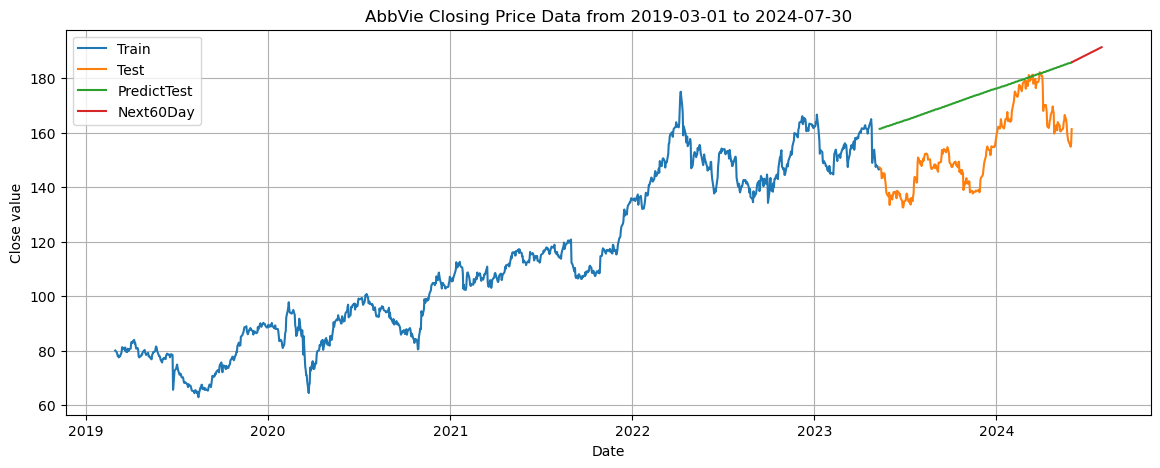

In [15]:
# Drawing
plt.figure(figsize=(14, 5))

plt.plot(df.index[:train_size], scaler.inverse_transform(np.array([y_train]).reshape(-1, 1)))
plt.plot(df.index[train_size:], y_test)
plt.plot(df.index[train_size:], y_pred)
plt.plot(index_next_60_days, y_next_60_days)

plt.legend(['Train', 'Test', 'PredictTest', 'Next60Day'])
plt.grid()
plt.title(f"AbbVie Closing Price Data from {df.index[0].strftime('%Y-%m-%d')} to {index_next_60_days[-1].strftime('%Y-%m-%d')}")
plt.xlabel("Date")
plt.ylabel("Close value")
plt.savefig('image/LR_82_60day_ABBV.png')
plt.show()